<a href="https://colab.research.google.com/github/minicks/Datascience__school/blob/main/04_05_%EB%B6%80%EB%B6%84%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.5 부분회귀

만약 회귀분석을 한 후에 새로운 독립변수를 추가하여 다시 회귀분석을 한다면 그 전에 회귀분석으로 구했던 가중치의 값은 변할까 변하지 않을까? 
예를 들어 $x_1$이라는 독립변수만으로 회귀분석한 결과가 다음과 같다고 하자.

$$ y = w_1 x_1 + e $$

이 때 새로운 독립변수 $x_2$를 추가하여 회귀분석을 하게 되면 이 때 나오는 $x_1$에 대한 가중치 $w'_1$가 원래의 $w_1$과 같을까 다를까?

$$ y = w_1' x_1 + w_2' x_2 + e' $$

답부터 말하자면 

> **일반적으로 $w'_1$의 값은 원래의 $w_1$의 값과 다르다.** 

즉. 우리가 종속변수에 영향을 미치는 모든 독립변수를 회귀모형에 포함하지 않는 한 모형의 가중치는 항상 편향된(biased) 값이 된다. 이 사실은 다음과 같이 증명할 수 있다.

독립변수를 $X_1$, $X_2$라는 두 개의 그룹으로 나눈다. 

$$ X = \begin{bmatrix} X_1 & X_2 \end{bmatrix} $$

만약 독립변수 $X_1$만으로 회귀분석을 하면 가중치 벡터는 다음과 같다.

$$ w_1 = (X_1^TX_1)^{-1}X_1^T y $$

여기에 독립변수 $X_2$를 추가한 새로운 선형 회귀모형을 생각해 보자.

$$
y = \hat{y} + e' = 
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
+ e'
$$

이 식에서 $w'_1과 w'_2$은 두 독립변수를 모두 사용한 새로운 모형의 가중치 벡터이고 $e'$는 새로운 모형의 잔차 벡터이다. 양변에 $X$를 곱하여 직교 방정식을 구하면,

$$
\begin{bmatrix}
X_1^TX_1 & X_1^TX_2 \\
X_2^TX_1 & X_2^TX_2 \\
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^Ty \\ X_2^Ty
\end{bmatrix}
$$

부분행렬의 역행렬 공식을 사용하여 이 방정식을 풀면 다음과 같은 공식을 얻을 수 있다.

$$
\begin{aligned}
w'_1 
&= (X_1^TX_1)^{-1}X_1^T(y - X_2 w'_2) \\
&= (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T X_2 w'_2 \\
\end{aligned}
$$

이 값은 독립변수 $X_1$만으로 회귀분석을 한 결과와 다르다.  

$$ w'_1 = w_1 - (X_1^TX_1)^{-1}X_1^T X_2 w'_2 $$


따라서 

> **새로운 독립변수 그룹 $X_2$를 추가해서 다시 회귀분석을 한다면 기존 가중치 벡터의 값이 달라진다.**

단, 다음과 같은 경우에는 두가지 회귀분석의 결과가 같을 수 있다.

(1) $w'_2=0$. 즉 $X_2$와 $y$의 상관관계가 없는 경우

(2) $X_1^T X_2 = 0$. 즉 독립변수 $X_1$과 독립변수 $X_2$가 직교하는 경우. 독립변수 $X_1$과 독립변수 $X_2$이 서로 상관관계가 없으면 직교할 가능성이 높다.

### 프리슈-워-로벨 정리

프리슈-워-로벨(Frisch–Waugh–Lovell) 정리 혹은 FWL 정리는 위 결과를 다른 방식으로 표현한 것이다.

(1) 특정한 독립변수 그룹 $X_1$로 종속변수 $y$를 선형 회귀분석하여 잔차 $y^{\ast}$를 구한다.

(2) $X_1$로 다른 독립변수 $x_2$를 선형 회귀분석하여 나온 잔차 $x_2^{\ast}$를 구한다. 

(3) $y^{\ast}$를 종속변수로하고 $x_2^{\ast}$를 독립변수로 하여 선형 회귀분석하여 구한 가중치는 $X_1$과  $x_2$를 모두 사용하여 $y$를 선형 회귀분석하였을 때 $x_2$에 대한 가중치와 같다.

증명은 다음과 같다. 모든 독립변수를 사용한 회귀분석 모형에서 $X_1$에 대한 가중치 벡터 $w_1$는 원래 다음 관계에서 구해야 한다.

$$ 
y = 
\begin{bmatrix}
X_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix}
+ e
$$

이 때 직교 방정식은 다음과 같다.

$$
\begin{bmatrix}
X_1^TX_1 & X_1^Tx_2 \\
x_2^TX_1 & x_2^Tx_2 \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^Ty \\ x_2^Ty
\end{bmatrix}
$$

이 식의 아랫 부분만 쓰면 다음과 같다.

$$
x_2^TX_1w_1 + x_2^Tx_2w_2 = x_2^Ty
$$


여기에 앞에서 구했던 $w_1$ 값을 대입하면,

$$
w_1 = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T x_2 w_2 \\
$$

이 식을 정리하면

$$
x_2^TX_1(X_1^TX_1)^{-1}X_1^Ty - x_2^TX_1(X_1^TX_1)^{-1}X_1^T x_2 w_2 + x_2^Tx_2w_2 = x_2^Ty
$$


$$
x_2^T(I - X_1(X_1^TX_1)^{-1}X_1^T) x_2 w_2  = x_2^T (I - X_1(X_1^TX_1)^{-1}X_1^T)y
$$

여기에 $X_1$으로 선형 회귀분석하였을 때의 잔차 행렬 $M_1$

$$
M_1 = I - X_1(X_1^TX_1)^{-1}X_1^T
$$

을 적용하면,

$$
x_2^T (M_1 x_2) w_2  = x_2^T (M_1 y)
$$

이다. 잔차 행렬의 성질을 이용하면,

$$
(M_1 x_2)^T (M_1 x_2) w_2  = (M_1x_2)^T (M_1 y)
$$

가 된다. 

$M_1 x_2$는 $X_1$으로 $x_2$를 회귀분석한 잔차 벡터이고 $M_1 y$는 $X_1$으로 $y$를 회귀분석한 잔차 벡터이므로 

$$
x_2^{\ast ^T} x_2^{\ast} w_2 = x_2^{\ast T} y^{\ast}
$$


따라서 $x_2^{\ast}$를 독립변수, $y^{\ast}$를 종속변수로 선형 회귀분석한 결과와 같아진다.

### 부분회귀 플롯

독립변수의 갯수가 많을 때 **특정한 하나의 독립변수의 영향력을 시각화하는 방법이 부분회귀 플롯(Partial Regression Plot)**이다. Added Variable Plot이라고도 한다.

부분회귀 플롯을 그리기 위해서는 3번의 선형 회귀분석을 해야 한다.

1. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 종속변수 $y$를 선형 회귀분석하여 잔차 $y^{\ast}$를 구한다.
2. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 특정한 독립변수 $x_2$를 선형 회귀분석하여 잔차 $x_2^{\ast}$를 구한다.
3. 잔차 $x_2^{\ast}$를 독립변수로, 잔차 $y^{\ast}$를 종속변수로 하여 선형 회귀분석한다.

이렇게 구한 $x_2^{\ast}$, $y^{\ast}$의 스캐터 플롯과 회귀분석 결과를 나타낸 것이 부분회귀 플롯이다.

보스턴 데이터를 예로 들어보자.

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

단순하게 AGE라는 독립변수와 MEDV 종속변수간의 관계를 살펴보면 마치 음의 상관관계가 있는 것처럼 보인다.

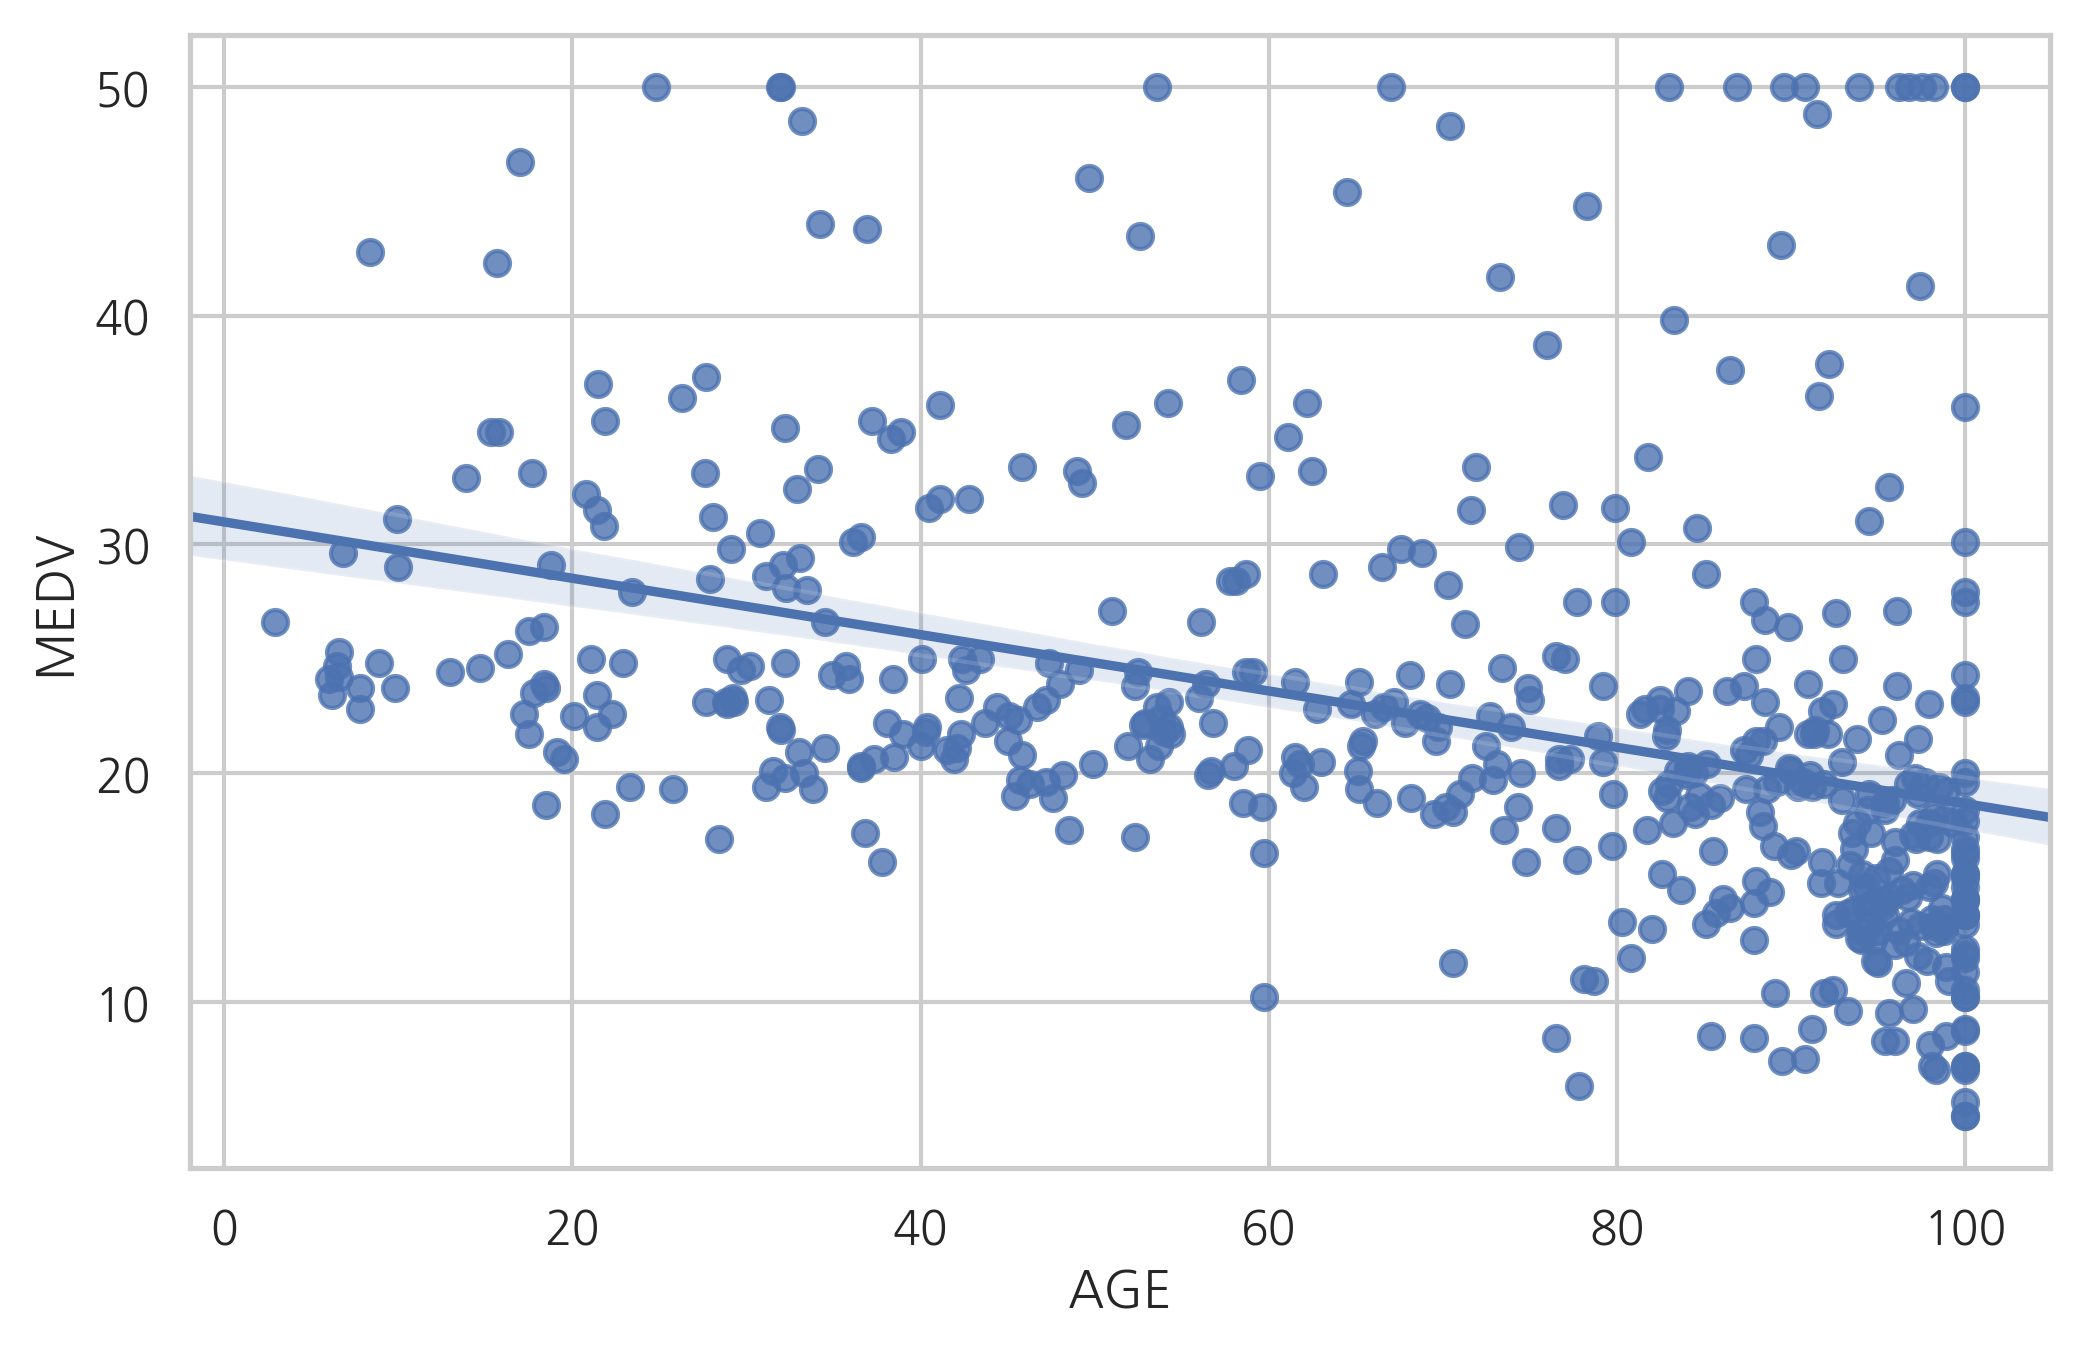

In [ ]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

statsmodels 패키지의 `sm.graphics.plot_partregress` 명령을 쓰면 부분회귀 플롯을 그릴 수 있다. 이 때 다른 변수의 이름을 모두 지정해 주어야 한다. 

```
plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
```

* `endog`: 종속변수 문자열
* `exog_i`: 분석 대상이 되는 독립변수 문자열
* `exog_others`: 나머지 독립변수 문자열의 리스트
* `data`: 모든 데이터가 있는 데이터프레임
* `obs_labels`: 데이터 라벨링 여부
* `ret_coords`: 잔차 데이터 반환 여부


부분회귀 플롯으로 살펴보면 AGE 변수와 종속변수는 상관관계가 없다는 것을 알 수 있다.

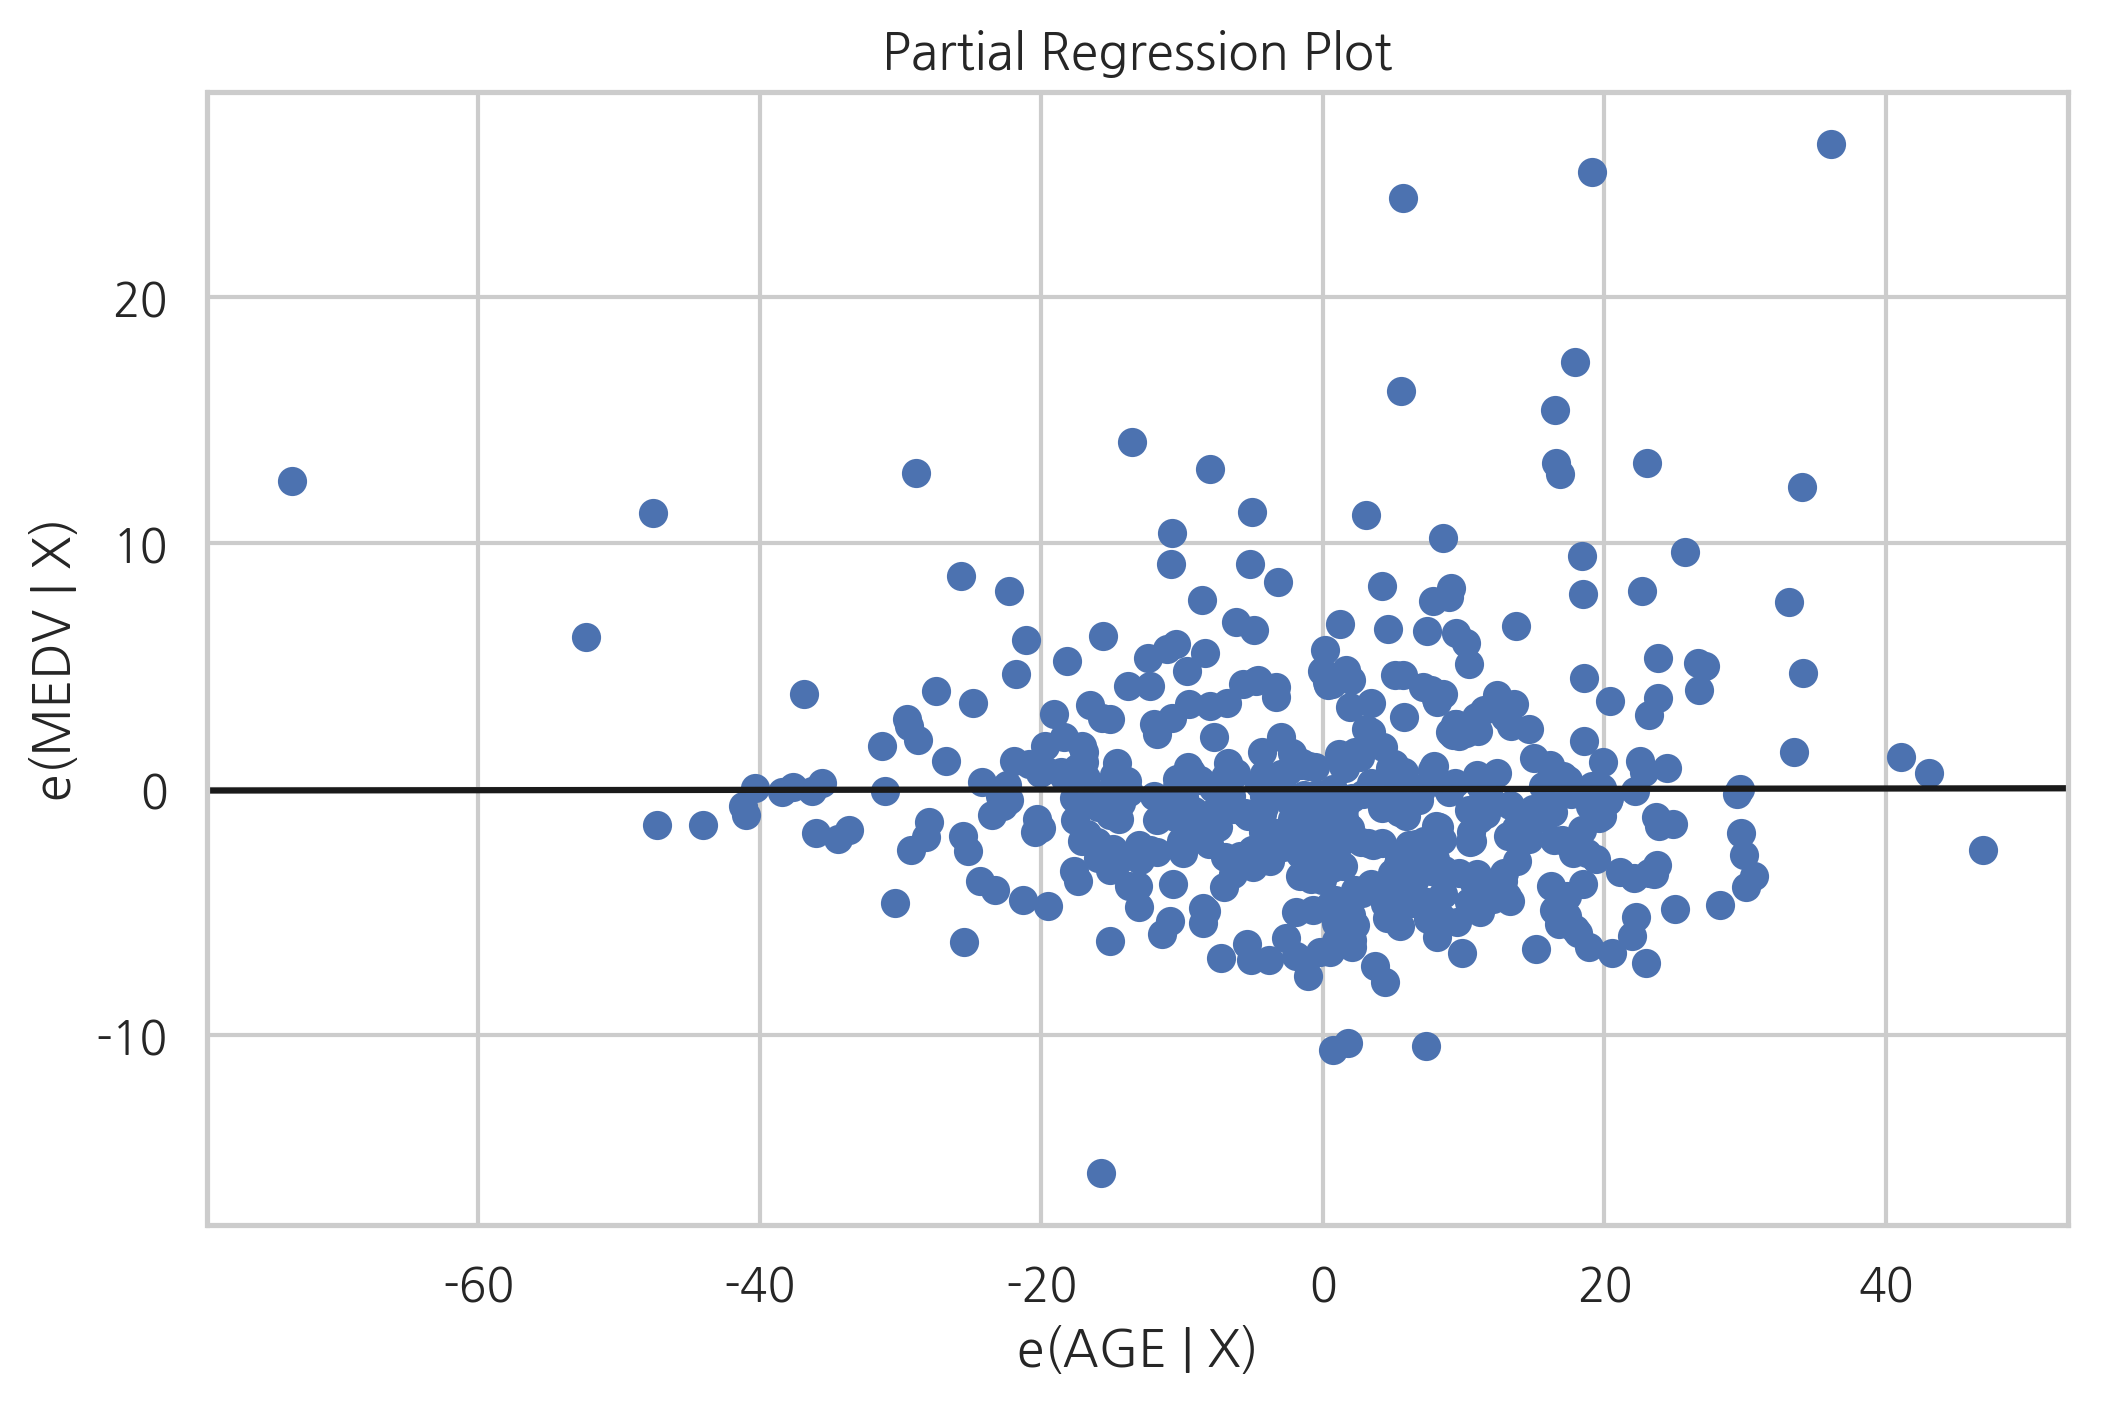

In [ ]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

부분회귀 플롯에서 가로축의 값은 독립변수 자체의 값이 아니라 어떤 독립변수에서 다른 독립변수의 영향을 제거한 일종의 "순수한 독립변수 성분"을 뜻한다.

`sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 부분회귀 플롯을 그릴 수 있다.

```
plot_partregress_grid(result, fig)
```

* `result`: 회귀분석 결과 객체
* `fig`: `plt.figure` 객체

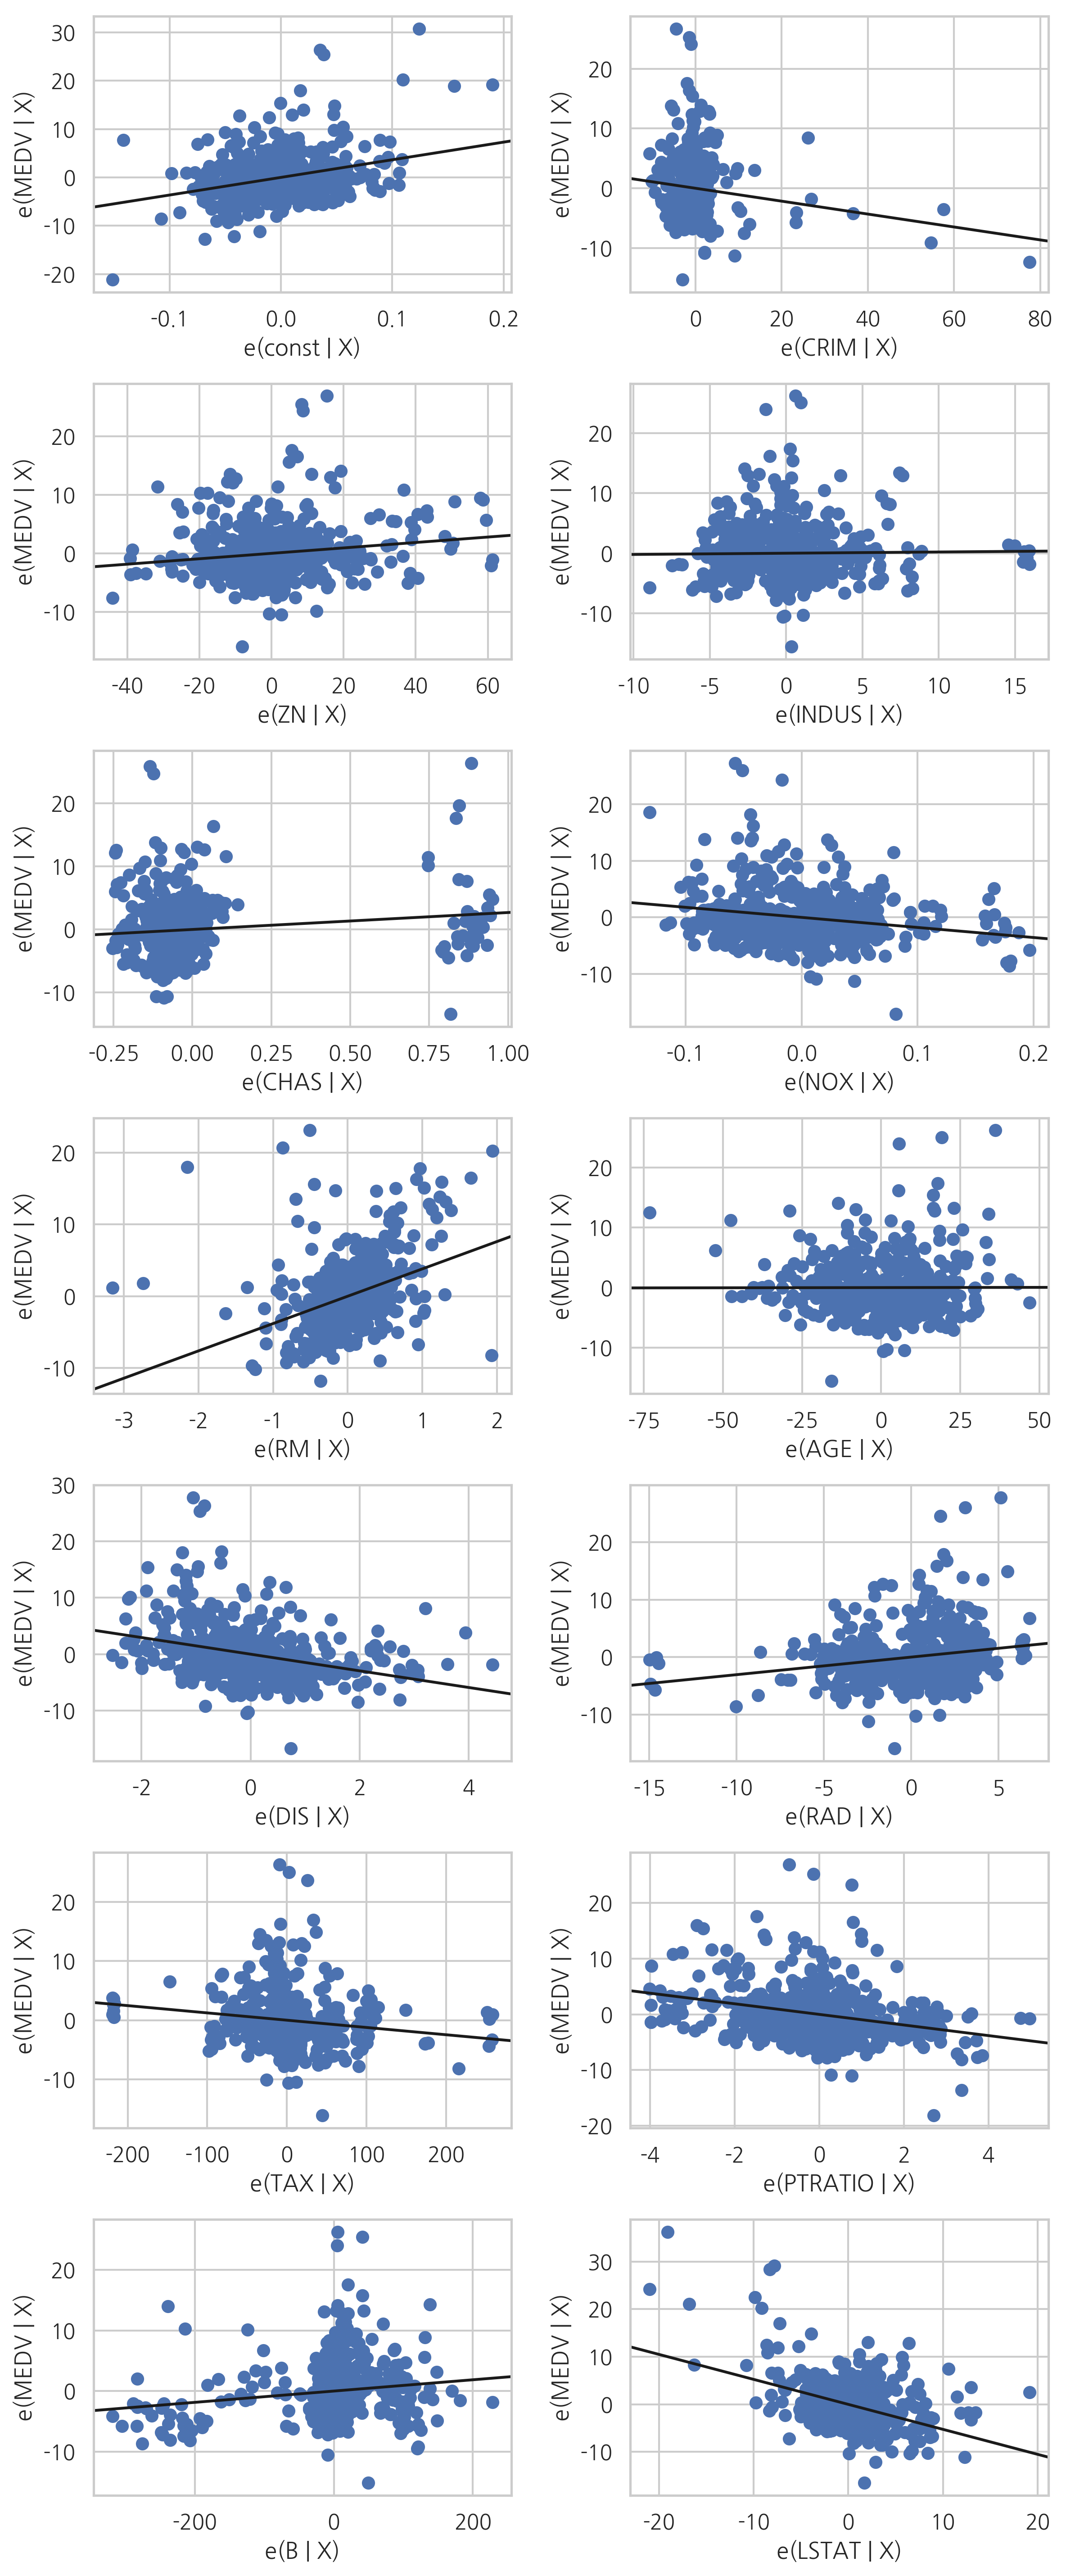

In [ ]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

### CCPR 플롯

CCPR(Component-Component plus Residual) 플롯도 부분회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

다음과 같은 회귀 모형이 있다고 가정하자.

$$ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $$

CCPR 플롯은 이 성분 중에서 

* $x_i$를 가로축으로
* $w_i x_i + e$을 세로축으로

그린 스캐터 플롯이다.

statsmodels 패키지의 `sm.graphics.plot_ccpr` 명령으로 CCPR 플롯을 그릴 수 있다.

```
plot_ccpr(result, exog_idx)
```

* `result`: 회귀분석 결과 객체
* `exog_idx`: 분석 대상이 되는 독립변수 문자열

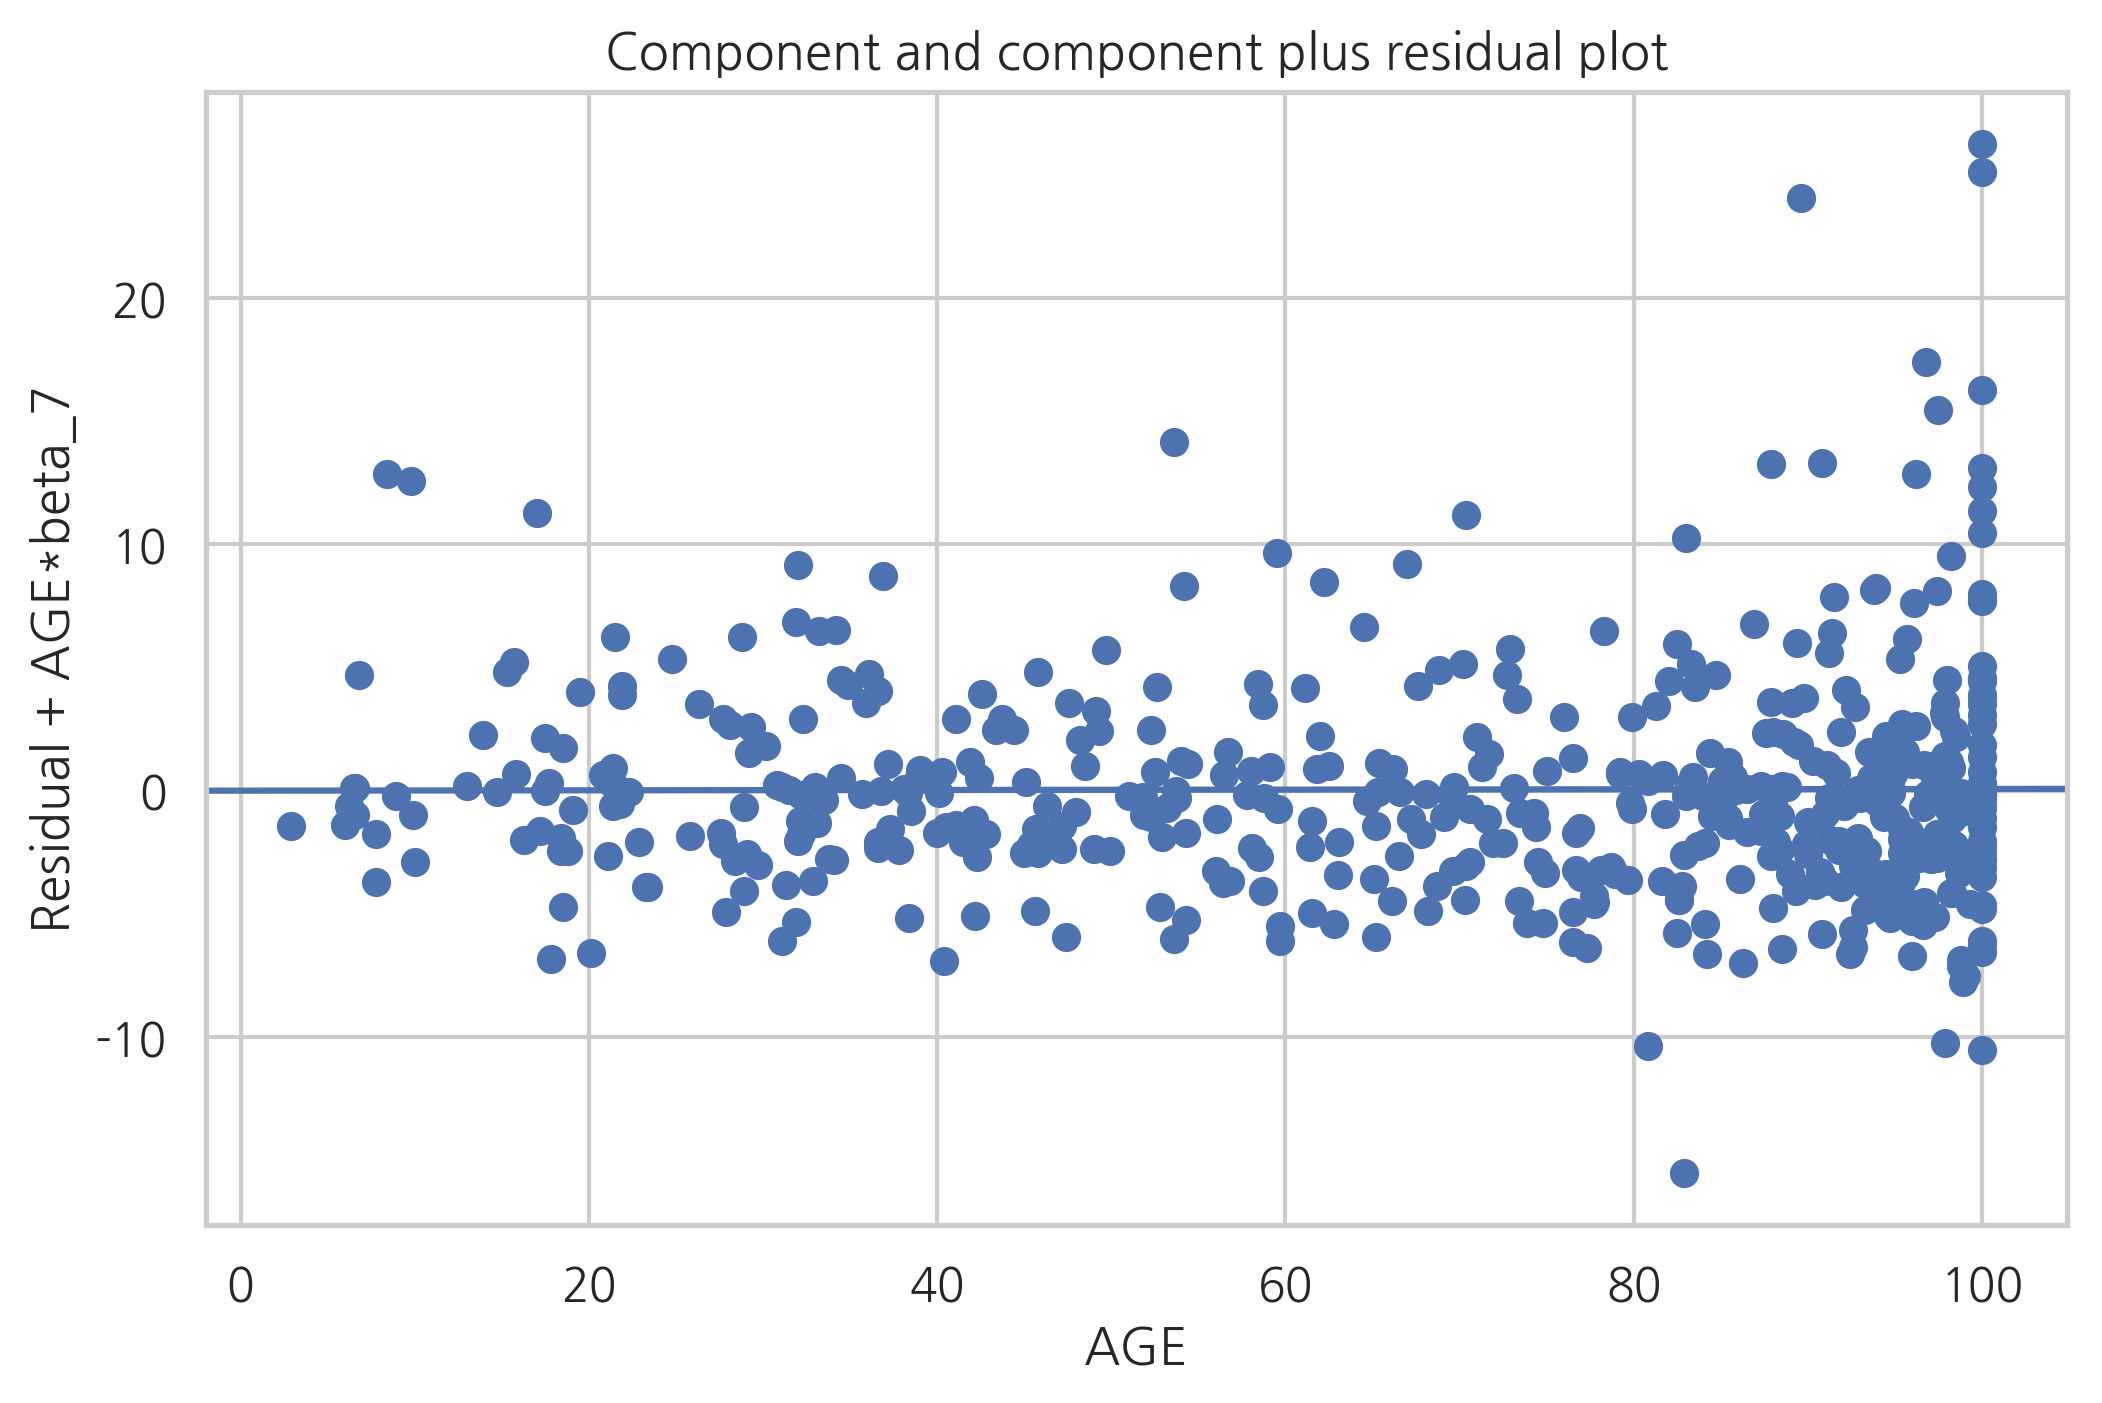

In [ ]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

CCPR 플롯에서는 부분회귀 플롯과 달리 독립변수가 원래의 값 그대로 나타난다.

마찬가지로 `sm.graphics.plot_ccpr_grid` 명령을 쓰면 전체 데이터에 대해 한번에 CCPR 플롯을 그릴 수 있다.

`plot_ccpr_grid` 명령은 모든 독립변수에 대해 CCPR 플롯을 그려준다.

```
plot_ccpr_grid(result, fig)
```

* `result`: 회귀분석 결과 객체
* `fig`: `plt.figure` 객체

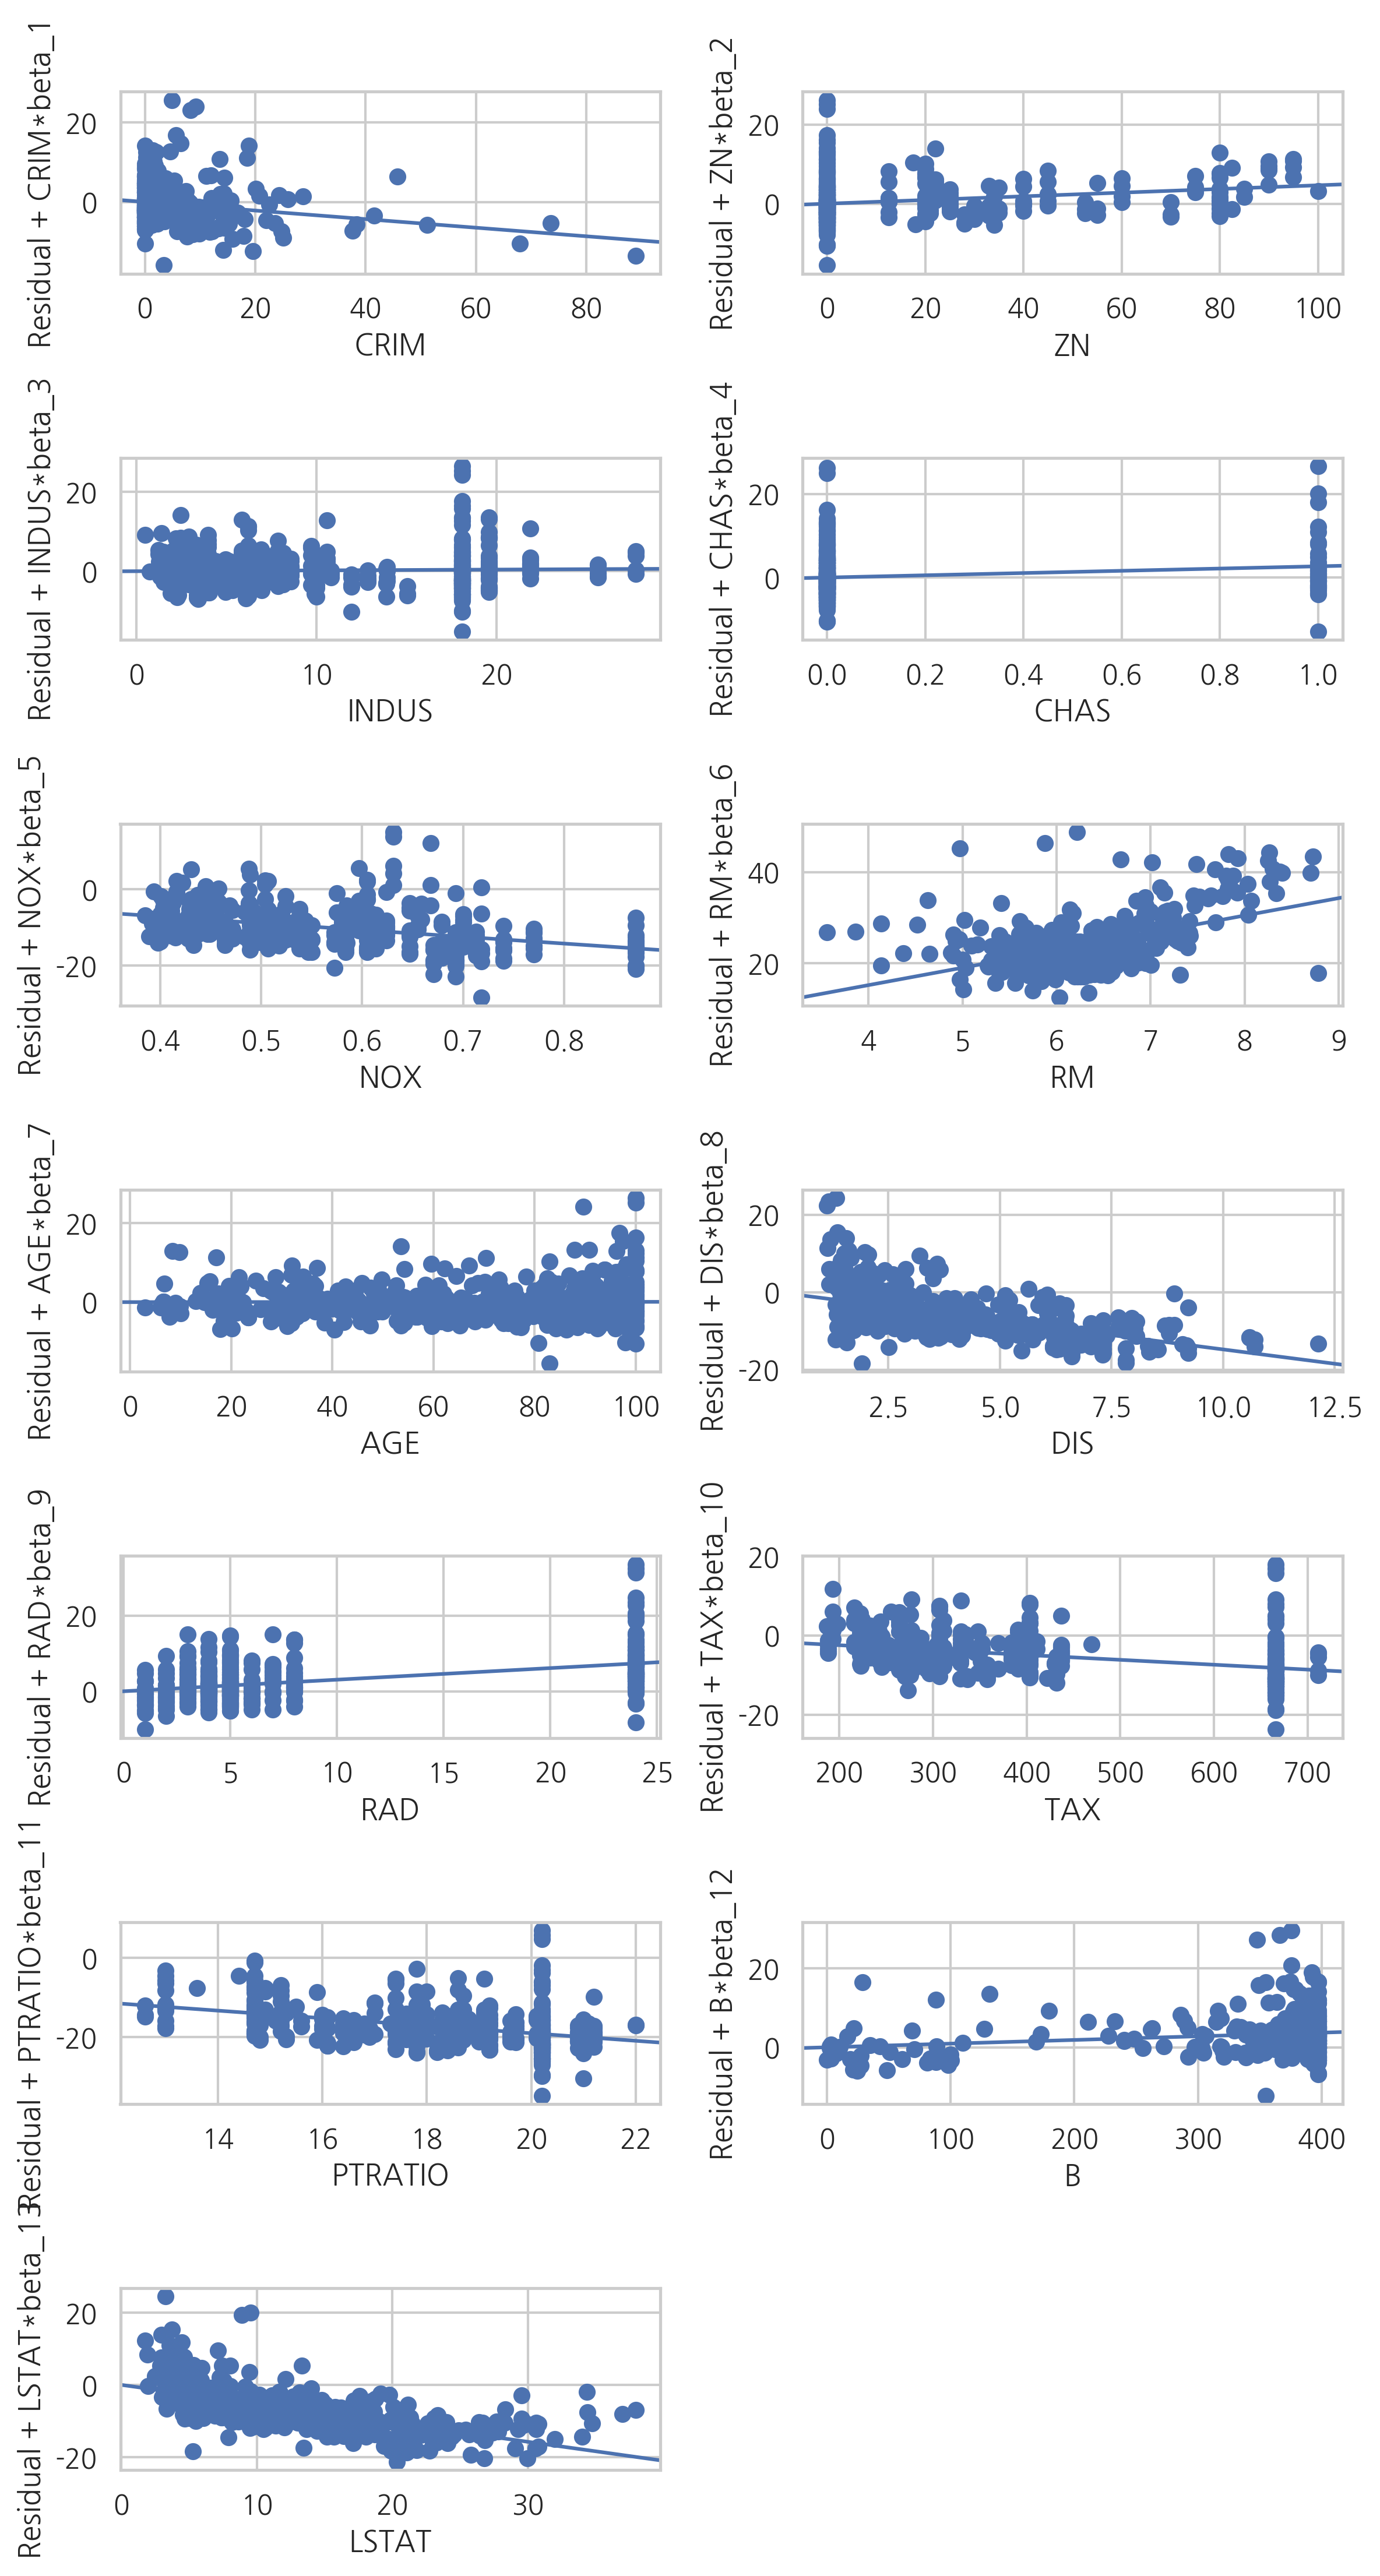

In [ ]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

`plot_regress_exog` 명령은 부분회귀 플롯과 CCPR을 같이 보여준다.

```
plot_regress_exog(result, exog_idx)
```

* `result`: 회귀분석 결과 객체
* `exog_idx`: 분석 대상이 되는 독립변수 문자열

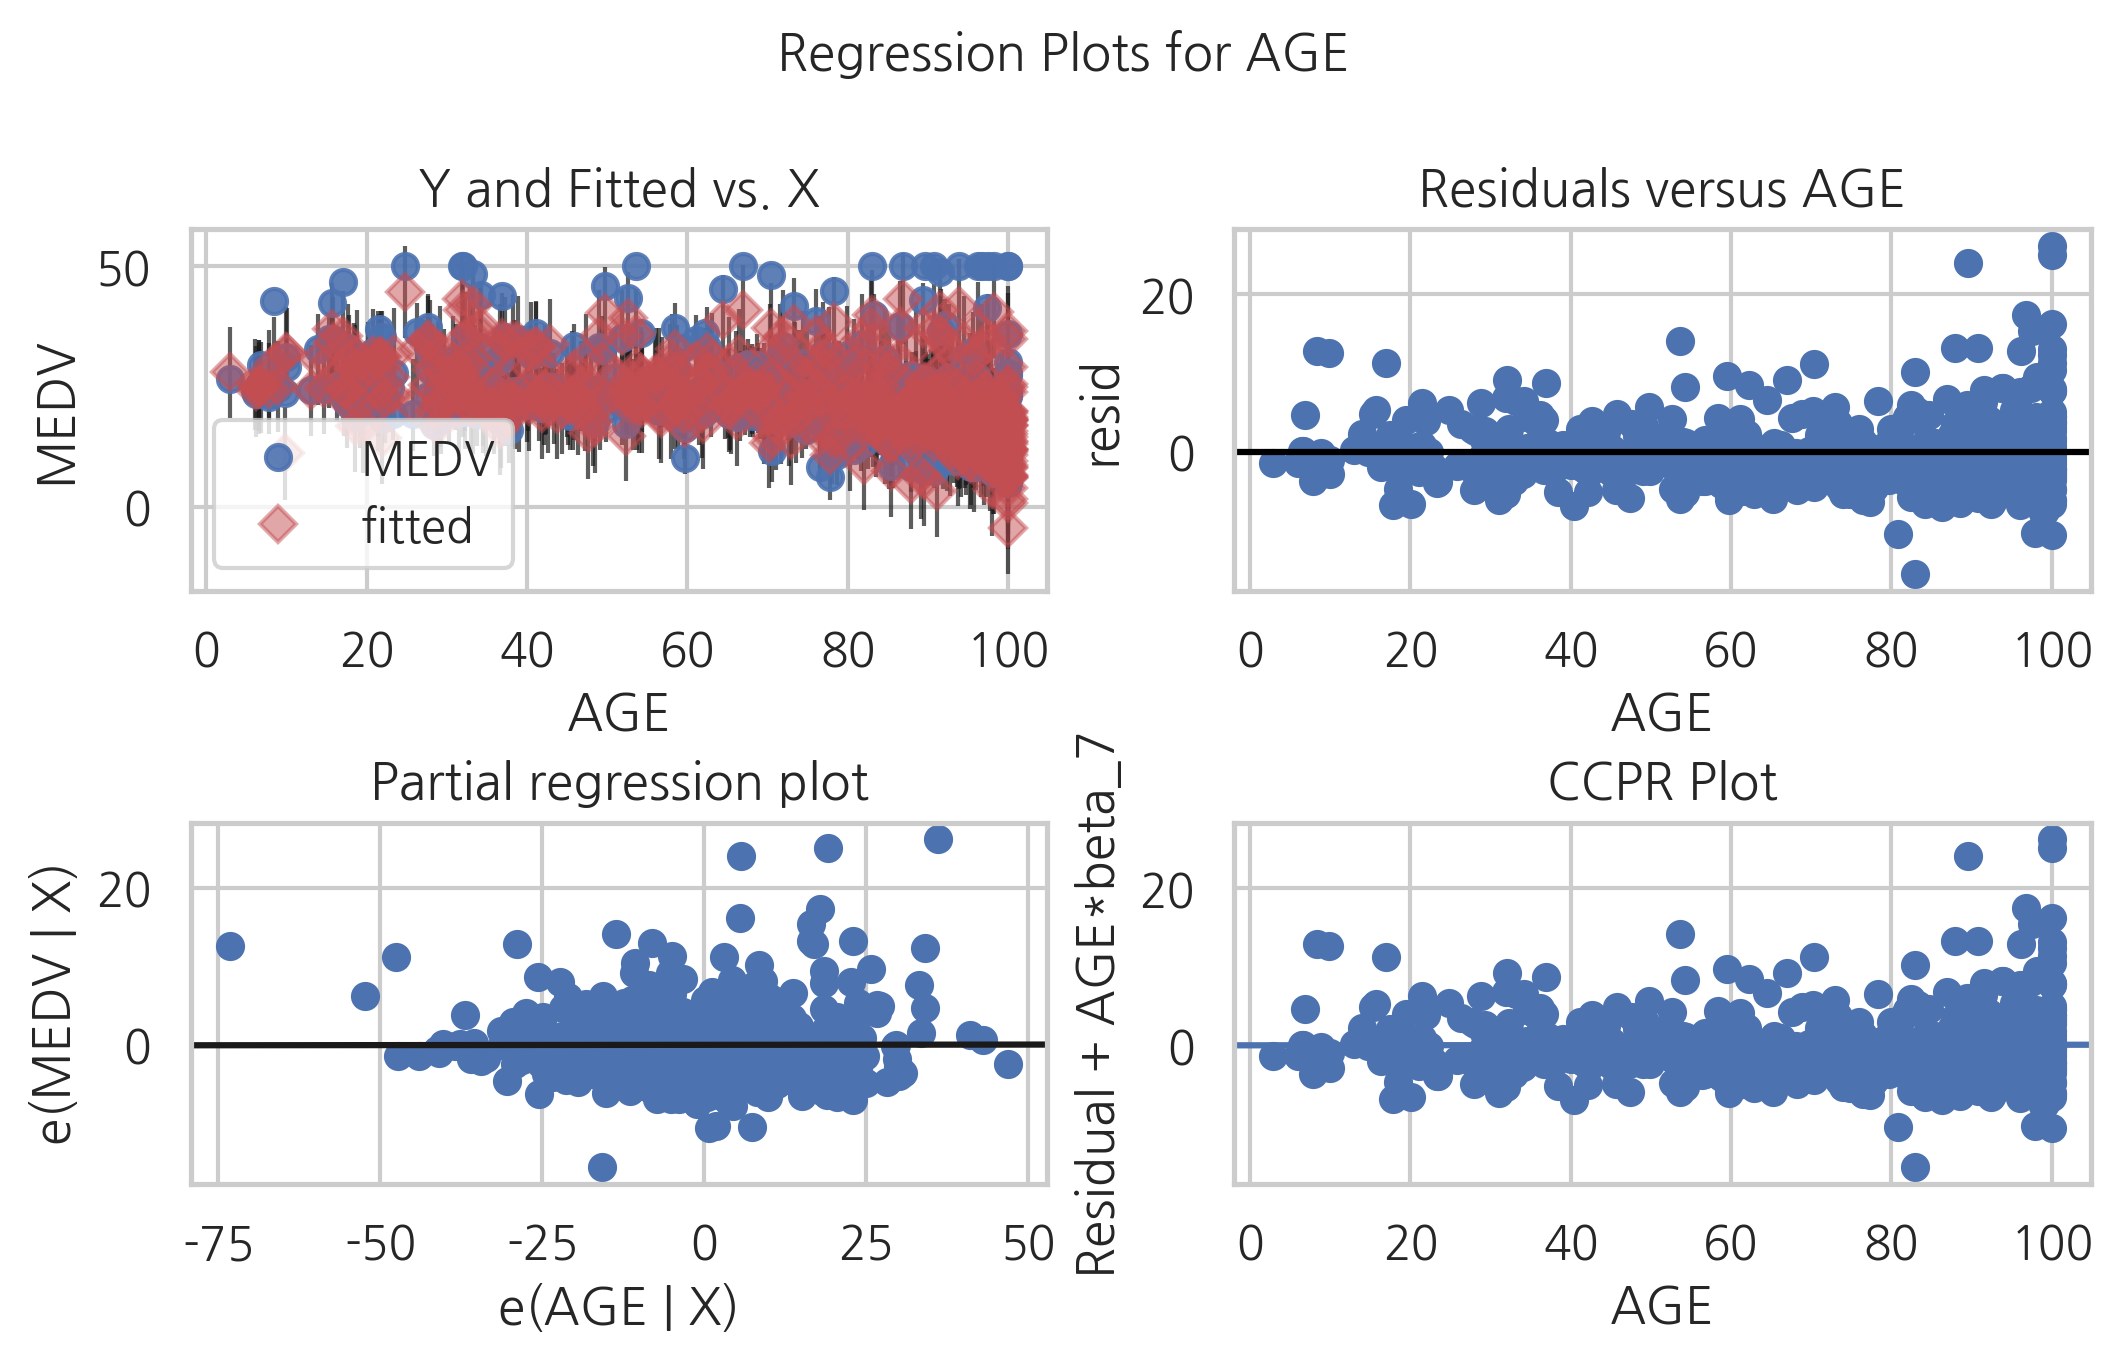

In [ ]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()